# TD 2B : Python autres langages

Il est plus ou moins facile d'utiliser d'autres langages de programmation depuis Python. C'est beaucoup plus facile avec [Jupyter](https://jupyter.org/) et les [commandes magiques](http://nbviewer.jupyter.org/github/jupyter/jupyter/blob/1.x/examples/notebooks/Cell%20Magics.ipynb). Dans ce notebooks, nous verrons le [langage R](http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx/notebooks/python_r.html), [Cython](http://nbviewer.jupyter.org/github/jupyter/jupyter/blob/3607712653c66d63e0d7f13f073bde8c0f209ba8/docs/examples/notebooks/cython_extension.ipynb) et les [commandes magiques](http://nbviewer.jupyter.org/github/jupyter/jupyter/blob/1.x/examples/notebooks/Cell%20Magics.ipynb). Mais il existe de nombreuses options déjà implémentées par d'autres [C#](http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx/notebooks/python_csharp.html), [F#](http://nbviewer.jupyter.org/github/BayardRock/IfSharp/blob/master/Feature%20Notebook.ipynb), [julia](http://stackoverflow.com/questions/24091373/best-way-to-run-julia-code-in-an-ipython-notebook-or-python-code-in-an-ijulia-n), [octave](http://nbviewer.jupyter.org/github/jupyter/jupyter/blob/d835d46dcc50043971b4a9915398bad1b5d63648/docs/examples/notebooks/octavemagic_extension.ipynb), [scilab](http://nbviewer.jupyter.org/github/blink1073/scilab2py/blob/master/example/scilabmagic_extension.ipynb?create=1).

In [ ]:
from pyquickhelper.ipythonhelper import add_notebook_menu
add_notebook_menu()

### R

Il faut d'abord lire ce notebook : [R et notebooks](http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx/notebooks/python_r.html). L'exemple qui suit en vient.

In [ ]:
import os
# au cas où la varialbe R_HOME manque ou est mal renseignée
os.environ["R_HOME"] = r"C:\Program Files\R\R-3.2.2"
os.environ.get("R_HOME", None)

'C:\\Program Files\\R\\R-3.2.2'

In [ ]:
from pyquickhelper.helpgen.utils_pywin32 import import_pywin32
import_pywin32()
import rpy2
%load_ext rpy2.ipython

Le code suivant spécifie une source par défaut pour télécharger les packages R. Cela évite l'apparition d'une fenêtre popup qui demande de choisir cette source. C'est indispensable pour les notebooks distants.

In [ ]:
%%R
cat(".Rprofile: Setting UK repositoryn")
r = getOption("repos") 
r["CRAN"] = "http://cran.uk.r-project.org"
options(repos = r)
rm(r)

In [ ]:
%%R
install.packages("actuar")

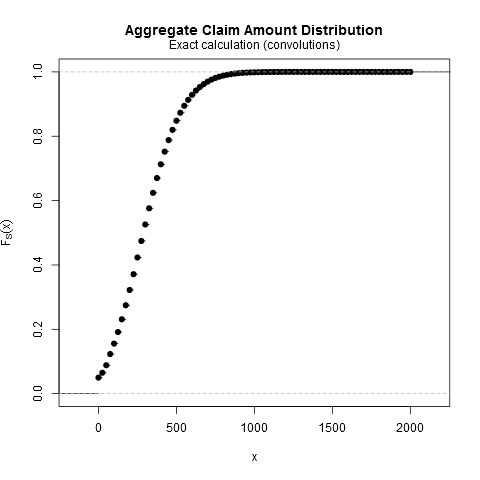

In [ ]:
%%R -o fx,x
library("actuar")
fx <- c(0, 0.15, 0.2, 0.25, 0.125, 0.075, 0.05, 0.05, 0.05, 0.025, 0.025)
pn <- c(0.05, 0.1, 0.15, 0.2, 0.25, 0.15, 0.06, 0.03, 0.01)
Fs <- aggregateDist("convolution", model.freq = pn, model.sev = fx, x.scale = 25)
x <- c(Fs(0), diff(Fs(25 * 0:21)))
print(summary(fx))
plot(Fs)

### Exercice 1 : régression sous R

L'exercice consiste à simuler des données en python selon le modèle $Y= 3X_1 -2X_2 + 2 + \epsilon$ avec $X_1,X_2,\epsilon \sim \mathcal{N}(0,1)$ puis à utiliser R pour retrouver les coefficients de la régression. Vous pouvez regarder cette page [Multiple Linear Regression](http://www.statmethods.net/stats/regression.html).

### Cython

**Remarque :** l'utilisation de [Cython](nécessite un compilateur C++ tel que [gcc](https://gcc.gnu.org/) sous Linux, Visual Studio 2010 pour Python 3.4 sous Windows, [Visual Studio 2015](https://www.visualstudio.com/en-us/downloads/download-visual-studio-vs.aspx) pour Python 3.5, ou [MinGW](http://www.mingw.org/) sous Windows avec un peu de bidouille : [Build a Python 64 bit extension on Windows 8](http://www.xavierdupre.fr/blog/2013-07-07_nojs.html). C'est ce que vérifie la fonction suivante après avoir appliqué cette bidouille pour Visual Studio 2015. On essaye donc Visual Studio 2015 avec Python 3.4 même s'il est possible que cela ne fonctionne pas dans tous les cas (Python 3.4 ayant été compilé avec VS 2010). Autres pistes de lecture : [Build xgboost](http://www.xavierdupre.fr/app/pymyinstall/helpsphinx/blog/2015/2015-09-12_build_xgboost.html), [Install theano](http://www.xavierdupre.fr/app/pymyinstall/helpsphinx/blog/2015/2015-09-12_install_theano.html).

In [ ]:
from pyquickhelper.ipythonhelper.cython_helper import ipython_cython_extension
try:
    r = ipython_cython_extension()
    print(r)
except Exception as e:
    print(e)

True


Le module [Jupyter](http://jupyter.org/) propose une façon simplifiée de se servir de Cython illustrée ici : [Some Linear Algebra with Cython](http://nbviewer.jupyter.org/github/carljv/cython_testing/blob/master/cython_linalg.ipynb). L'exemple suivant implémente l'algorithme du [Crible d'Ératosthène](http://fr.wikipedia.org/wiki/Crible_d'%C3%89ratosth%C3%A8ne). On commence par les préliminaires à n'exécuter d'une fois :

In [ ]:
%load_ext cython

The cython extension is already loaded. To reload it, use:
  %reload_ext cython


In [ ]:
%%cython
cimport cython
def cprimes(int kmax):
    cdef int n, k, i
    cdef int p[1000]
    result = []
    if kmax > 1000:
        kmax = 1000
    k = 0
    n = 2
    while k < kmax:
        i = 0
        while i < k and n % p[i] != 0:
            i = i + 1
        if i == k:
            p[k] = n
            k = k + 1
            result.append(n)
        n = n + 1
    return result

In [ ]:
cprimes(20)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71]

Le code est un mélange de C et de Python. Les calculs sont plus rapides du Python, moins rapides que du C pur. Cette façon de faire est particulièrement adaptée pour accélérer une courte fonction numérique appelée un très grand nombre de fois. Le gain est non négligeable. Il est préférable de connaître le C même s'il est possible de venir la bonne syntaxe par mimétisme. Cython s'interface bien avec [numpy](http://www.numpy.org/) : [Working with NumPy](http://docs.cython.org/src/tutorial/numpy.html) ou [Quelques exemples de programmation avec Cython](http://www-irma.u-strasbg.fr/irmawiki/index.php/Quelques_exemples_de_programmation_avec_Cython).

### Exercice 2 : distance d'édition en Cython

La fonction qui suit implémente la [distance de Lenvestein](http://fr.wikipedia.org/wiki/Distance_de_Levenshtein) qui est une distance entre deux mots. Il faut la transposer en Cython et mesurer le gain de temps avec [%timeit](http://nbviewer.ipython.org/gist/damontallen/5978528).

In [ ]:
def distance_edition(mot1, mot2):
    dist = { (-1,-1): 0.0 }              # double
    mx = len(mot1) + len(mot2)
    for i,c in enumerate(mot1) :
        dist[i,-1] = dist[i-1,-1] + 1
        dist[-1,i] = dist[-1,i-1] + 1
        for j,d in enumerate(mot2) :
            m = mx
            if (i-1,j) in dist : 
                x = dist[i-1,j] + 1
                m = min(m,x)
            if (i,j-1) in dist : 
                x = dist[i,j-1] + 1
                m = min(m,x)
            if (i-1,j-1) in dist :
                x = dist[i-1,j-1] + (1 if c != d else 0)
                m = min(m,x)
            dist[i,j] = m
    return dist[len(mot1)-1,len(mot2)-1]

In [ ]:
%timeit distance_edition("example","exemple")

1000 loops, best of 3: 496 µs per loop


Le calcul de la fonction se fait en ``double``, il suffit de remplacer ``0.0`` par ``0`` sur la seconde ligne pour que le calcul se fasse avec des entiers. La fonction est alors 10% plus rapide. La fonction s'accélère au fur et à mesure qu'on remplace les constantes entière (0, 1) en ``float`` (0.0, 1.0) car le langage n'effectue pas de conversion implicite.